# Skoda used car analysis

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


from autovizwidget.widget.utils import display_dataframe
from autovizwidget.widget.encoding import Encoding
from autovizwidget.widget.autovizwidget import AutoVizWidget

warnings.filterwarnings("ignore")

sns.set_context('talk')

***Dataset***: car usage dataset that consists of records of used Skoda cars that include specific features such as:

1. **model**: the name of each model owned by Skoda cars

2. **year**: the year when the car was used

3. **price**: the selling price of each car

4. **transmission**: the type of transmission of each car; whether it is manual, semi-auto, automatic or other

5. **mileage**: the number of miles travelled or covered in a unit fuel

6. **fuelType**: the type of fuel of each car; whether it is run by petrol, diesel, hybrid or other

7. **mpg**: the number of miles travelled or covered per gallon

8. **engineSize**: the size of engine


### Reading the csv file as pndas DataFrame

In [2]:
# dataset source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

df = pd.read_csv("skoda.csv")

#display(df)

### First and last five rows of DataFrame

In [3]:
display(df.head(5))
display(df.tail(5))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,40.9,1.5


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
6262,Yeti,2014,11440,Semi-Auto,14569,Petrol,44.8,1.2
6263,Octavia,2014,10990,Semi-Auto,49999,Petrol,56.5,1.4
6264,Fabia,2017,9500,Semi-Auto,17131,Petrol,61.4,1.0
6265,Citigo,2016,5999,Manual,21747,Petrol,62.8,1.0
6266,Fabia,2017,9232,Semi-Auto,42530,Petrol,60.1,1.2


In [4]:
#display_dataframe(df)

### Checking for missing values and data types

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267 entries, 0 to 6266
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6267 non-null   object 
 1   year          6267 non-null   int64  
 2   price         6267 non-null   int64  
 3   transmission  6267 non-null   object 
 4   mileage       6267 non-null   int64  
 5   fuelType      6267 non-null   object 
 6   mpg           6267 non-null   float64
 7   engineSize    6267 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 391.8+ KB


None

**Observation**: No missing values

## Counting unique value for each categorical column

### Unique value count for "model" column

In [6]:
model_count = df['model'].value_counts()
display(model_count)

 Fabia           1571
 Octavia         1477
 Superb           791
 Kodiaq           472
 Citigo           470
 Yeti Outdoor     458
 Karoq            390
 Scala            192
 Rapid            152
 Kamiq            141
 Yeti             136
 Roomster          17
Name: model, dtype: int64

#### Percentage of unique values present in the 'model' column

In [7]:
model_count = df['model'].value_counts()

model_count = pd.DataFrame(model_count)

model_count = model_count.reset_index()

model_count = model_count.rename(columns={'index':'model', 'model':'No_of_cars'})

model_count['% of cars'] = np.round(((model_count['No_of_cars']/model_count['No_of_cars'].sum())*100), 2)
display(model_count)


,model,No_of_cars,% of cars
0,Fabia,1571,25.07
1,Octavia,1477,23.57
2,Superb,791,12.62
3,Kodiaq,472,7.53
4,Citigo,470,7.50
5,Yeti Outdoor,458,7.31
6,Karoq,390,6.22
7,Scala,192,3.06
8,Rapid,152,2.43
9,Kamiq,141,2.25


### Unique value count for "year" column

In [8]:
year_count = df['year'].value_counts()
display(year_count)

2019    2114
2017    1539
2018     874
2016     840
2015     285
2020     276
2014     183
2013      93
2012      17
2011      14
2010      10
2009       6
2008       6
2007       4
2006       3
2005       2
2004       1
Name: year, dtype: int64

#### Percentage of unique values present in the 'year' column

In [9]:
year_count = df['year'].value_counts()

year_count = pd.DataFrame(year_count)

year_count = year_count.reset_index()

year_count = year_count.rename(columns={'index':'year', 'year':'No_of_cars'})

year_count['% of cars'] = np.round(((year_count['No_of_cars']/year_count['No_of_cars'].sum())*100), 2)
display(year_count)


,year,No_of_cars,% of cars
0,2019,2114,33.73
1,2017,1539,24.56
2,2018,874,13.95
3,2016,840,13.40
4,2015,285,4.55
5,2020,276,4.40
6,2014,183,2.92
7,2013,93,1.48
8,2012,17,0.27
9,2011,14,0.22


### Unique value count for "transmission" column

In [10]:
transmission_count = df['transmission'].value_counts()
display(transmission_count)

Manual       3754
Semi-Auto    1408
Automatic    1104
Other           1
Name: transmission, dtype: int64

#### Percentage of unique values present in the 'transmission' column

In [11]:
transmission_count = df['transmission'].value_counts()

transmission_count = pd.DataFrame(transmission_count)

transmission_count = transmission_count.reset_index()

transmission_count = transmission_count.rename(columns={'index':'transmission', 'transmission':'No_of_cars'})

transmission_count['% of cars'] = np.round(((transmission_count['No_of_cars']/transmission_count['No_of_cars'].sum())*100), 2)
display(transmission_count)


,transmission,No_of_cars,% of cars
0,Manual,3754,59.90
1,Semi-Auto,1408,22.47
2,Automatic,1104,17.62
3,Other,1,0.02


### Unique value count for "fuelType" column

In [12]:
fuelType_count = df['fuelType'].value_counts()
display(fuelType_count)

Petrol    4171
Diesel    2069
Hybrid      18
Other        9
Name: fuelType, dtype: int64

#### Percentage of unique values present in the 'fuelType' column

In [13]:
fuelType_count = df['fuelType'].value_counts()

fuelType_count = pd.DataFrame(fuelType_count)

fuelType_count = fuelType_count.reset_index()

fuelType_count = fuelType_count.rename(columns={'index':'fuel_type', 'fuelType':'No_of_cars'})

fuelType_count['% of cars'] = np.round(((fuelType_count['No_of_cars']/fuelType_count['No_of_cars'].sum())*100), 2)
display(fuelType_count)


,fuel_type,No_of_cars,% of cars
0,Petrol,4171,66.55
1,Diesel,2069,33.01
2,Hybrid,18,0.29
3,Other,9,0.14


### Statistics for numerical columns in the Skoda used cars

In [14]:
df.describe()

,year,price,mileage,mpg,engineSize
count,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,2017.502314,14275.449338,20118.452050,56.589165,1.433509
std,1.734754,6332.051106,19955.410762,12.037576,0.394800
min,2004.000000,995.000000,5.000000,30.100000,0.000000
25%,2017.000000,9495.000000,5812.500000,50.400000,1.000000
50%,2018.000000,12998.000000,14653.000000,57.700000,1.400000
75%,2019.000000,17990.000000,28000.000000,62.800000,2.000000
max,2020.000000,91874.000000,300000.000000,201.800000,2.500000


**Observation**: 
  * The oldest car in the dataset is from 2004 and latest is from 2020
  * The average price of the cars is \\$14275; the cheapest car costs \\$995 and the most expensive one costs \\$91874
  * The lowest mileage is 5 miles and highest mileage is 300000 miles
  * The highest mpg is 201.8
  * Engine Size varies from 0 to 2.5 L

## Data Visualization using Different plots and graphs for catergorical and numerical variables

###  Creating a function to find the number of observations for unique value in a column of a DataFrame

In [15]:
def unique_val_count(data, column):
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

In [16]:
model_count = unique_val_count(df, 'model')
year_count = unique_val_count(df, 'year')
transmission_count = unique_val_count(df, 'transmission')
fuelType_count = unique_val_count(df, 'fuelType')

### Creating a function to show the number of observations for each unique value in a column using a barplot

In [17]:
def barplot(data, column_x, color, rotation, yticks):
    
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    plt.title("Number of cars present for each " + column_x)
    
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    plt.xticks(rotation=rotation)
    
    plt.yticks(yticks)

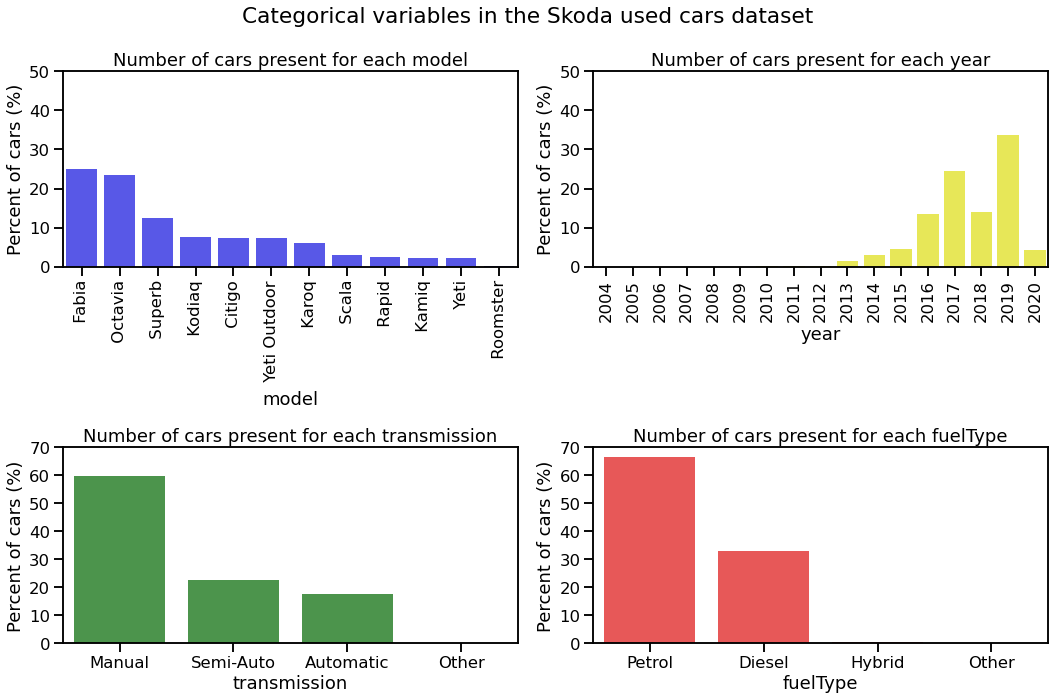

In [18]:
plt.figure(figsize=(15,10))

# Subplot 1
plt.subplot(2,2,1)
barplot(model_count, 'model', 'blue', 90, np.arange(0,51,10))

# Subplot 2
plt.subplot(2,2,2)
barplot(year_count, 'year', 'yellow', 90, np.arange(0,51,10))

# Subplot 3
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'green', 0, np.arange(0,71,10))

# Subplot 4
plt.subplot(2,2,4)
barplot(fuelType_count, 'fuelType', 'red', 0, np.arange(0,71,10))

plt.suptitle("Categorical variables in the Skoda used cars dataset")

plt.tight_layout()

plt.show()

**Observation**: 
   * The top 3 selling car models are Fabia, Octavia and Superb
   * Most of the cars were sold from 2016 to 2019
   * Manual, semi-auto and automatic transmission types are ruling the chart
   * Most of the cars are petrol and diesel driven

### Finding the relation between numerical variables of the dataset using Scatterplot
* mileage vs. price
* mpg vs. price


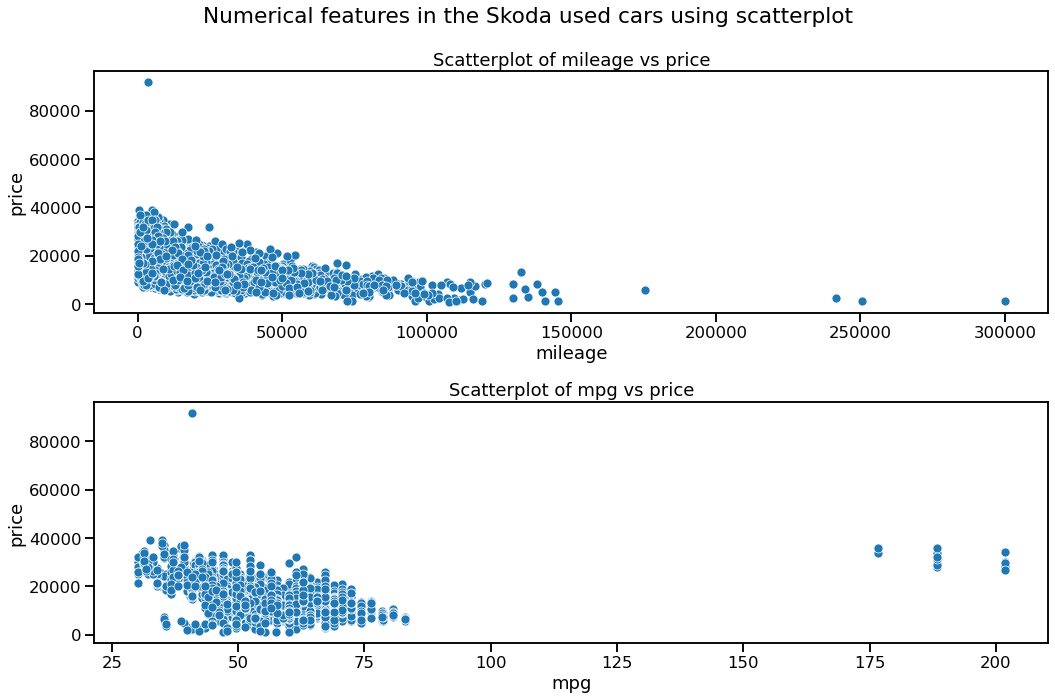

In [19]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
sns.scatterplot(x='mileage', y='price', data=df)
plt.title("Scatterplot of mileage vs price")

plt.subplot(2,1,2)
sns.scatterplot(x='mpg', y='price', data=df)
plt.title("Scatterplot of mpg vs price")


plt.suptitle('Numerical features in the Skoda used cars using scatterplot')
plt.tight_layout()
plt.show()

**Observation**:
  * **mileage vs price**: The mileage of the cars increases as the price of the vehicle decreases.
  * **mpg vs price**: Though the mpg of the cars increases as the price of the vehicle increases, the case is not same                           everytime.

### Changing the 'hue' parameter and  creating a 'Trend line'

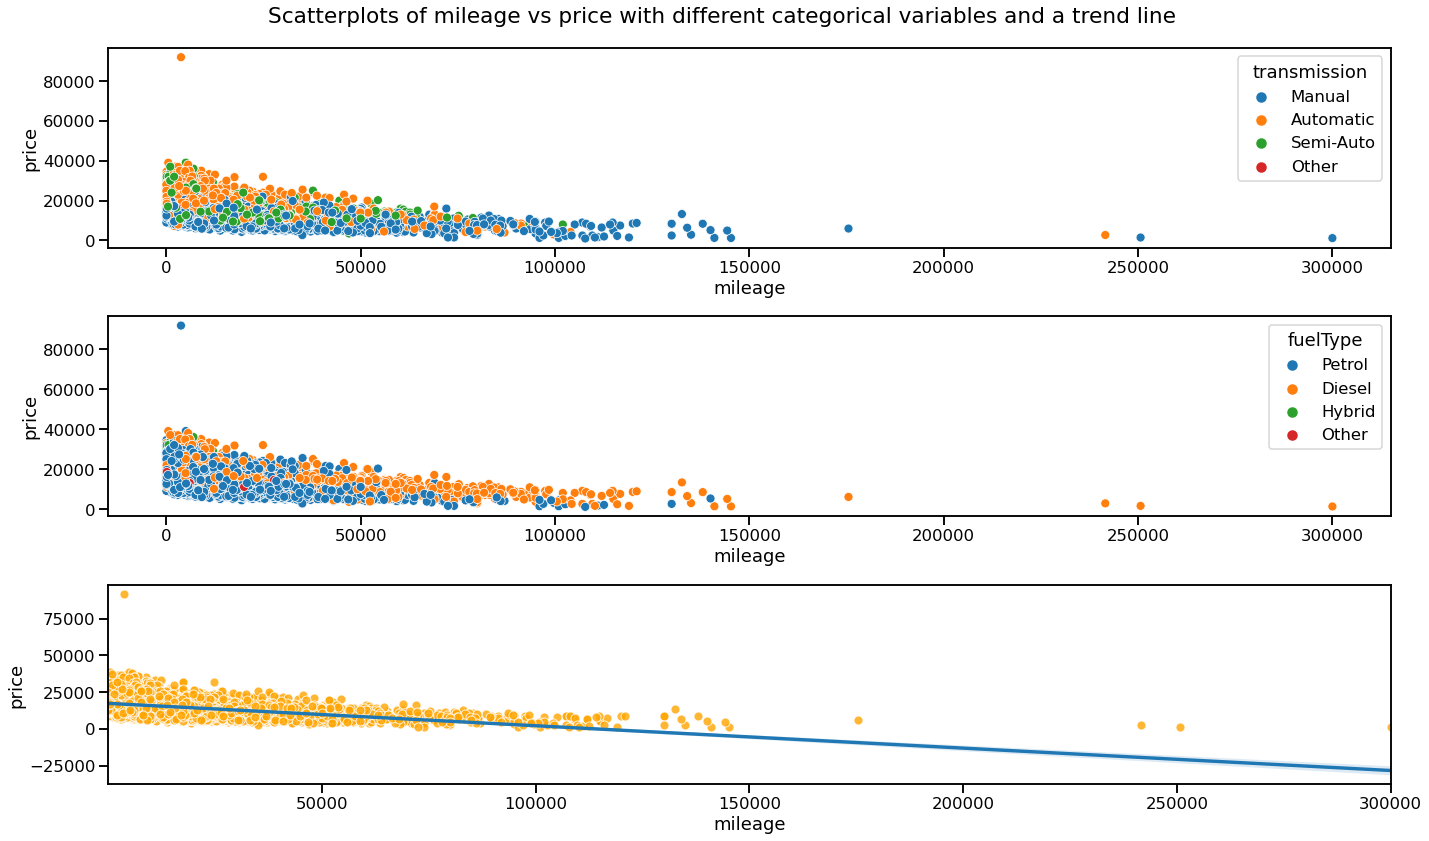

In [20]:
plt.figure(figsize=(20,12))

# Adding a categorical feature: 'transmission'
plt.subplot(3,1,1)
sns.scatterplot(x='mileage', y='price', data=df, hue= 'transmission')

# Adding a categorical feature: 'fuelType'
plt.subplot(3,1,2)
sns.scatterplot(x='mileage', y='price', data=df, hue= 'fuelType')

# Adding a trend line and changing the color of the scatter plot
plt.subplot(3,1,3)
sns.regplot(x='mileage', y='price', data=df, scatter_kws={'color':'orange','edgecolor': 'white'})

plt.suptitle("Scatterplots of mileage vs price with different categorical variables and a trend line")

plt.tight_layout()
plt.show()

**Observation**:
  * Adding 'transmission' as a 'hue' parameter of the first graph, we can easily differentiate which car has more mileage       and identify the vehicle's price.
  * Adding 'fuelType', we can't extract the information correctly. So we can say that all categorical variables did not         give us the necessary information.
  * Using 'Trendline' in the third graph can mislead the information because the price of the vehicle can never be             negative.

### Creating Histogram and Distribution plot for the numerical columns of the Dataset

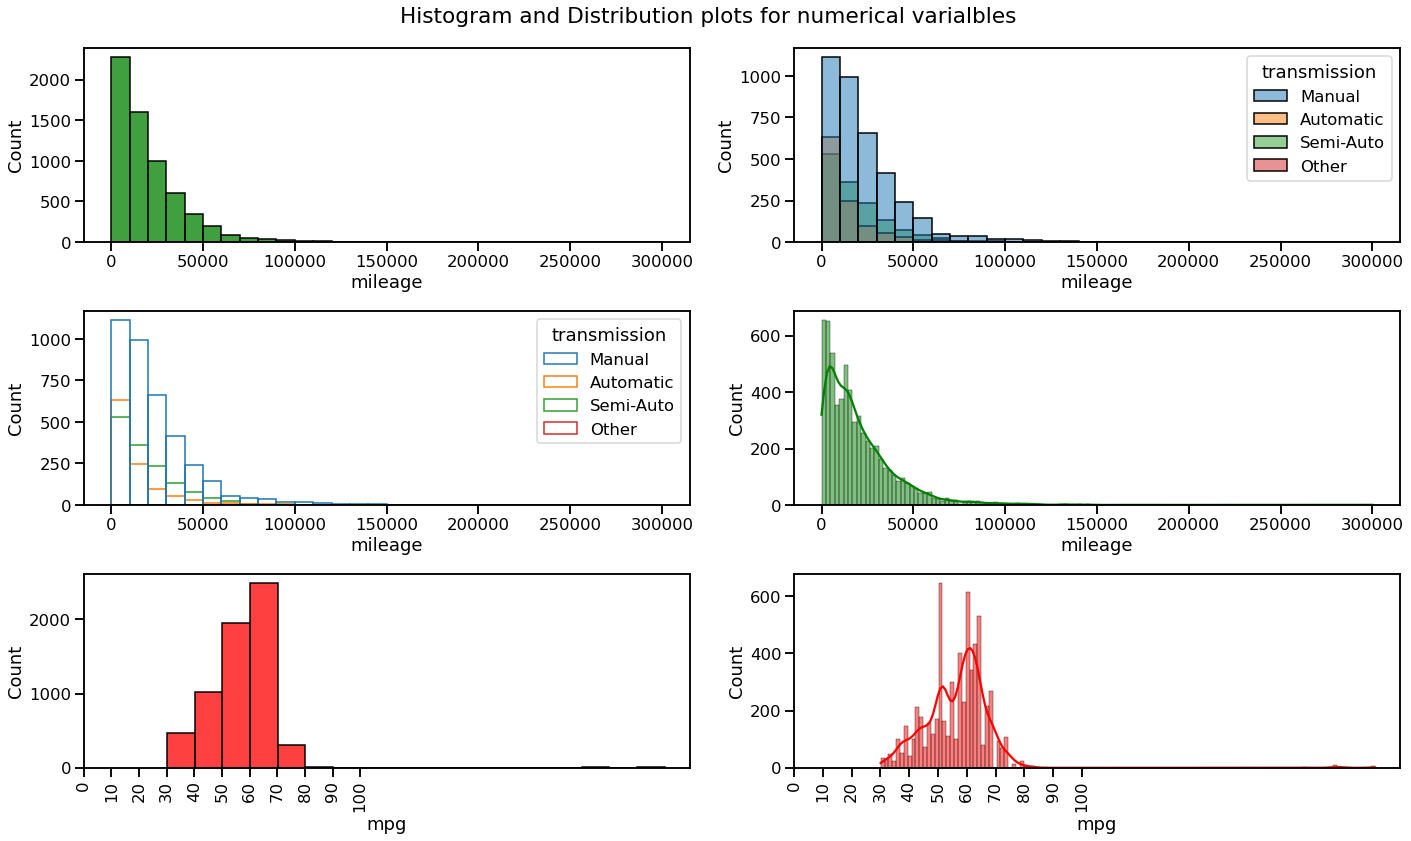

In [21]:
plt.figure(figsize=(20,12))

# Histogram of mileage
plt.subplot(3,2,1)
sns.histplot(df['mileage'],binwidth=10000,color= 'green')

# Histogram of mileage using categorical variable as hue
plt.subplot(3,2,2)
sns.histplot(data=df,x='mileage',binwidth=10000,hue ='transmission')

# Histogram of mileage using categorical variable as hue without fill
plt.subplot(3,2,3)
sns.histplot(data=df, x='mileage', binwidth= 10000, hue= "transmission",fill=False)

# Distribution plot of mileage
plt.subplot(3,2,4)
sns.histplot(data=df,x='mileage', kde=True,color= 'green',alpha=0.5)

# Histogram of mpg
plt.subplot(3,2,5)
sns.histplot(data =df, x= 'mpg',binwidth=10,color= 'red')
plt.xticks(np.arange(0,101,10),rotation=90)

# Distribution plot of mpg
plt.subplot(3,2,6)
sns.histplot(data=df, x='mpg',kde= True,color= 'red')
plt.xticks(np.arange(0,101,10),rotation=90)

plt.suptitle('Histogram and Distribution plots for numerical varialbles')
plt.tight_layout()
plt.show()

**Obeservation**:
  * The 1st histogram shows that most of the amount of data occured between 0 to 50000 miles. That means most of the cars       can travel upto 50000 miles.
  * The 2nd graph with hue parameter 'transmission' does not explain clearly how useful this is for visualising the data.
  * The 3rd graph with hue parameter without fill demolishes the shortcoming of the 2nd graph. Also shows that the Manually     transmitted cars have the most mileage.
  * The 4th graph shows that a positively skewed distribution and unimodal distribution.
  * The 5th graph for 'mpg' variable shows most of the occurence between 50 to 70
  * The 6th graph show that it is a multimodial distribution

### Creating ECDF plot with numerical columns of the dataset

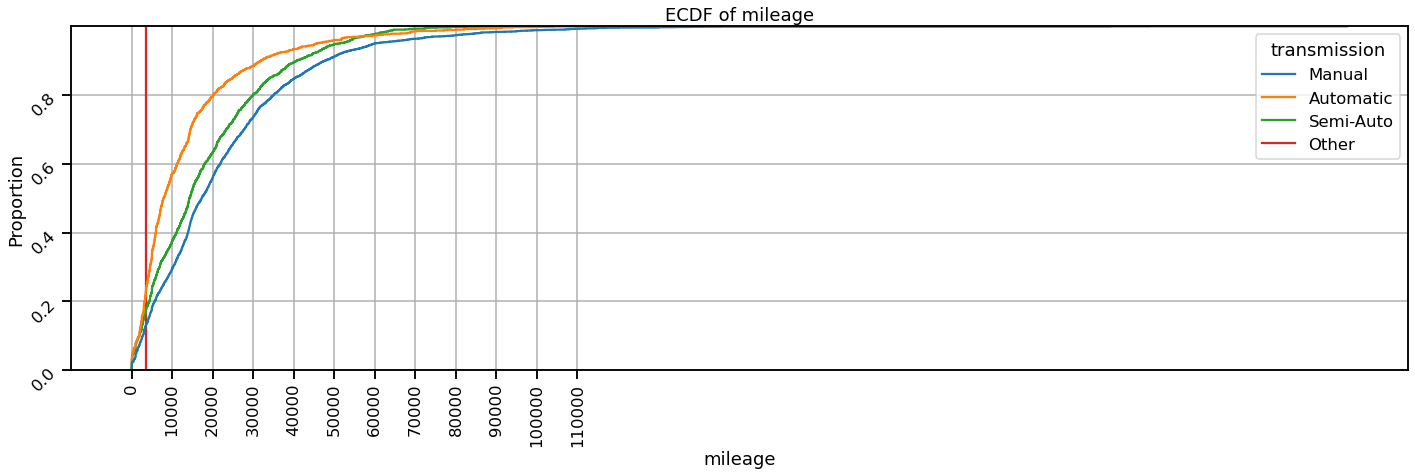

In [22]:
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)

# ECDF plot of mileage
sns.ecdfplot(data=df, x='mileage',stat= 'proportion',hue='transmission')
plt.xticks(np.arange(0,120000,10000),rotation=90)
plt.yticks(np.arange(0,1,0.2),rotation=45)
plt.title('ECDF of mileage')
plt.grid()


plt.tight_layout()
plt.show()

**Observation**:
    It represents the empirical cumulative distribution of mileage of Skoda used cars. For example, the probability of the mileage of an automatic Skoda car is less than or equal to 30000 miles is approximately 0.9. The probability of the mileage of manual and semi-auto Skoda cars is less than or equal to 30000 miles is approximately 0.8.

### Separating the numerical columns

In [23]:
def separate_num_cols(dataframe):

    # creating an empty list to keep the numeric columns*
    num_cols = []

    # creating a for loop to check the data types of all columns
    for col in dataframe.columns:
        if (dataframe[col].dtypes == 'int64') | (dataframe[col].dtypes == 'float64'):
            num_cols.append(col)
        
    return num_cols

In [24]:
numeric_cols = separate_num_cols(df)

print(numeric_cols)

['year', 'price', 'mileage', 'mpg', 'engineSize']


### Boxplot with numerical columns of the dataset

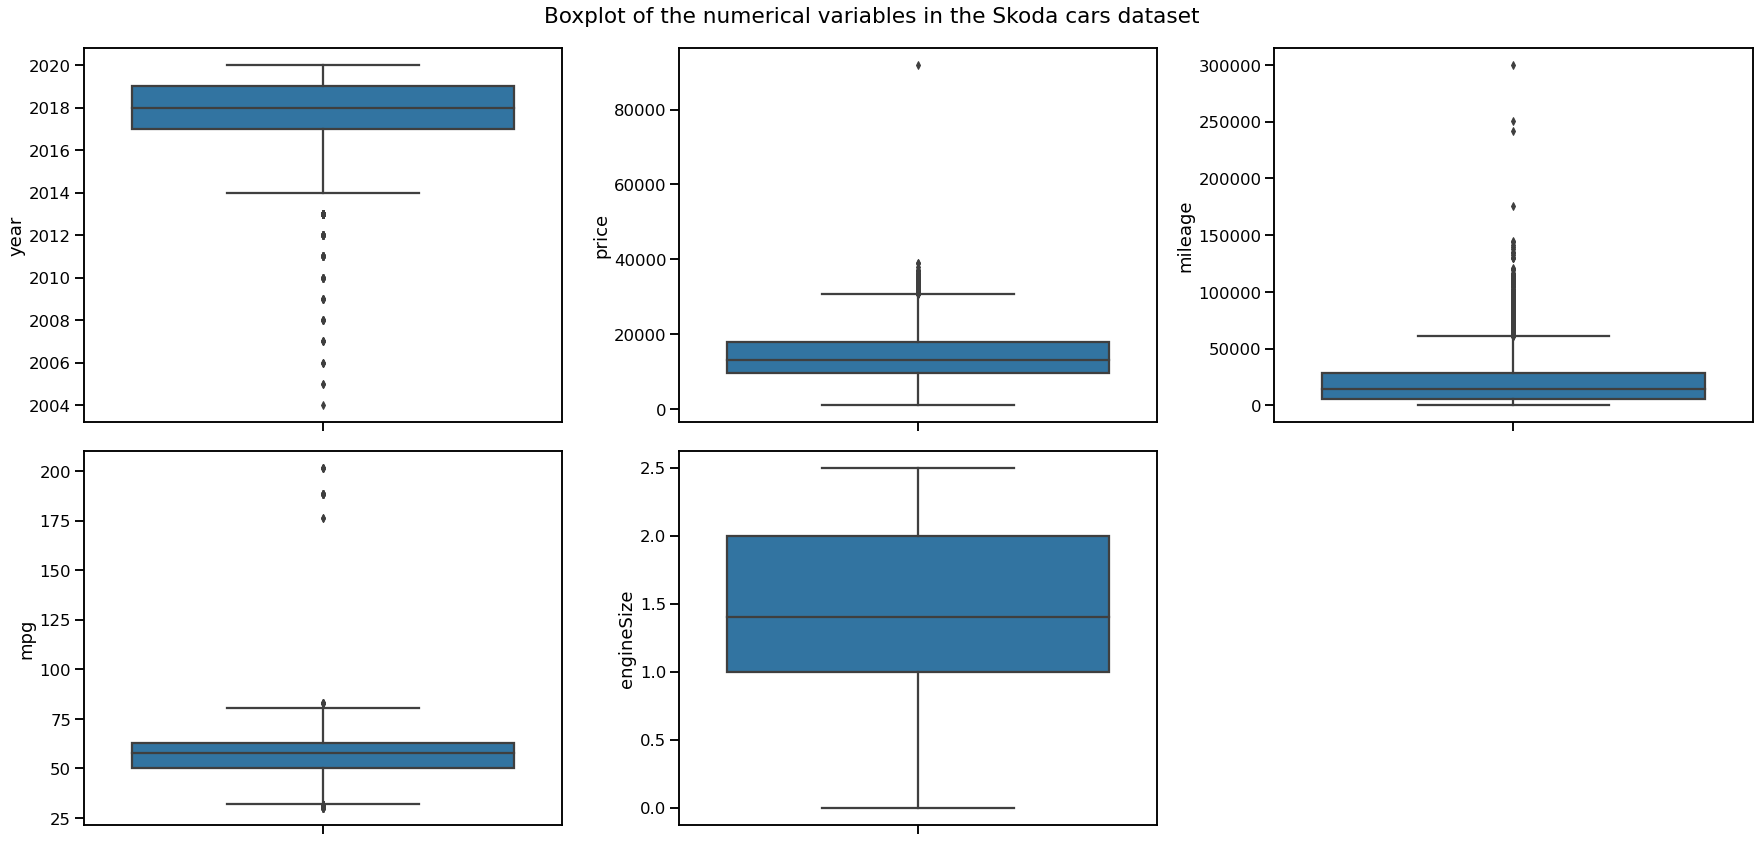

In [25]:
plt.figure(figsize=(25,12))
for index in range(len(numeric_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(y=df[numeric_cols[index]])

plt.suptitle("Boxplot of the numerical variables in the Skoda cars dataset")
plt.tight_layout()
plt.show()

**Based on model, transmission, and fuelType:**
 * A. What are the top 5 selling car models in the dataset?
 * B. What's the average selling price of the top 5 selling car models?
 * C. What's the total sale of the top 5 selling car models?

### Data Aggregation

In [26]:
df_agg = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg)

,count,mean,sum
model,,,
Citigo,470,6925.561702,3255014
Fabia,1571,9906.497136,15563107
Kamiq,141,19904.290780,2806505
Karoq,390,21067.546154,8216343
Kodiaq,472,25652.368644,12107918
Octavia,1477,13991.955315,20666118
Rapid,152,8277.611842,1258197
Roomster,17,5407.882353,91934
Scala,192,16988.614583,3261814


### Data preprocessing before visualization

In [27]:
def aggregation(col):
    
    # data aggregation using 'groupby' method
    data = df.groupby(col) ['price'].agg(['count','mean','sum'])
    
    # sort the dataframe based on the column 'count'
    data = data.sort_values(by='count', ascending=False)

    # create a new column percentage of the cars
    data['percent_of_cars'] = (data['count']/data['count'].sum())*100

     # convert the 'sum' column in millions
    data['sum'] = data['sum']/1000000

    # keep up to two decimal points
    data = data.round(2)

    # remove the 'count' column
    data = data.drop('count', axis=1)
    return (data) 



In [28]:
display(aggregation('model'))

,mean,sum,percent_of_cars
model,,,
Fabia,9906.50,15.56,25.07
Octavia,13991.96,20.67,23.57
Superb,18898.26,14.95,12.62
Kodiaq,25652.37,12.11,7.53
Citigo,6925.56,3.26,7.50
Yeti Outdoor,12737.09,5.83,7.31
Karoq,21067.55,8.22,6.22
Scala,16988.61,3.26,3.06
Rapid,8277.61,1.26,2.43


In [29]:
display(aggregation('transmission'))

,mean,sum,percent_of_cars
transmission,,,
Manual,11658.52,43.77,59.90
Semi-Auto,16285.11,22.93,22.47
Automatic,20609.33,22.75,17.62
Other,15999.00,0.02,0.02


In [30]:
display(aggregation('fuelType'))

,mean,sum,percent_of_cars
fuelType,,,
Petrol,13206.08,55.08,66.55
Diesel,16280.82,33.69,33.01
Hybrid,31225.94,0.56,0.29
Other,14957.78,0.13,0.14


### Barplot: Percentage of cars, Average and Total selling price of cars by model, transmission and fuelType

In [31]:
sns.set_style("darkgrid")

def barplot(col):
    # for clear image
    sns.set_context("talk")
    # set the background of the images
    sns.set_style('darkgrid')
    
    plt.figure(figsize=(20,8))
    # subplot 1 for count
    plt.subplot(1, 3, 1)
    sns.barplot(x='percent_of_cars', y=aggregation(col).index, data=aggregation(col), orient='h', color='blue')
    plt.title("Percentage of cars in each " + str(col))
    plt.xlabel("Percentage of cars (%)")
    plt.ylabel(col)
    # subplot 2 for mean
    plt.subplot(1, 3, 2)
    sns.barplot(x='mean', y=aggregation(col).index, data=aggregation(col), orient='h', color='orange')
    plt.title("Average resale value of the cars of each " + str(col))
    plt.xlabel("Average price ($)")
    plt.ylabel("")
    # subplot 3 for sum
    plt.subplot(1, 3, 3)
    sns.barplot(x='sum', y=aggregation(col).index, data=aggregation(col), orient='h', color='green')
    plt.title("Total resale value of the cars by each "+ str(col))
    plt.xlabel("Total price in million $")
    plt.ylabel("")

    plt.suptitle("Barplots of the Skoda used car")
    plt.tight_layout()
    plt.show()

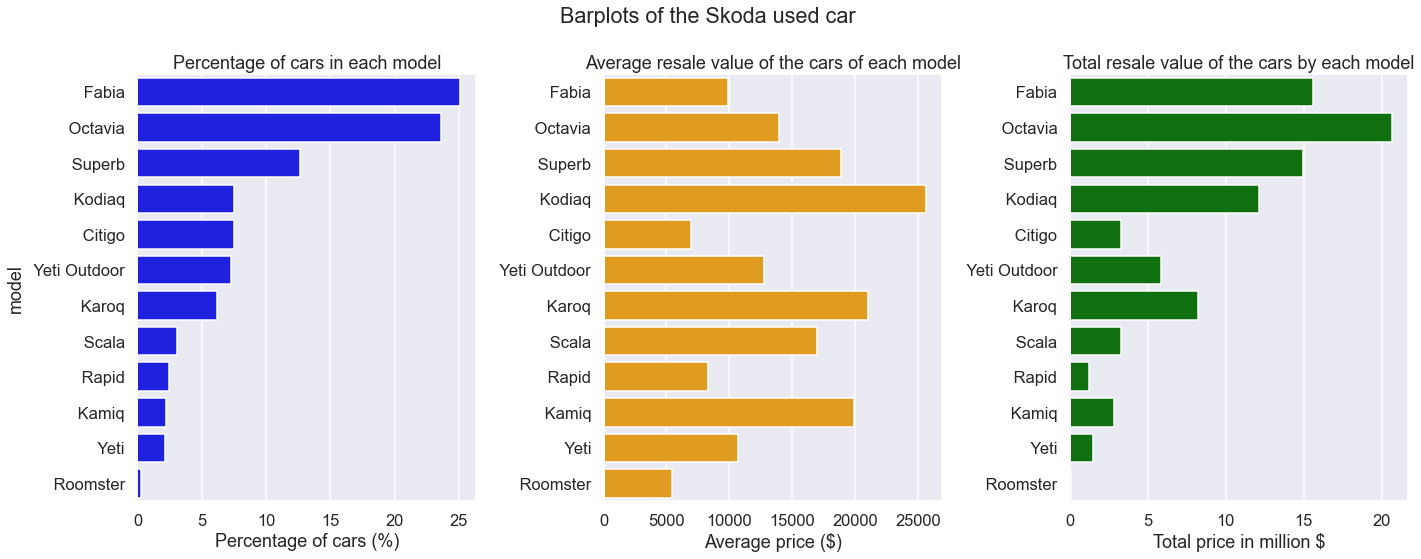

In [32]:
barplot('model')

**Observation:**
   * The top 5 selling car models are Fabia (25.07%), Octavia (23.57%), Superb (12.62%), Kodiaq (7.53%) and Citigo (7.5%)

   * The top 5 average selling price car models are Kodiaq, Karoq, Kamiq, Superb and Scala.

   * The top 5 total selling price car models are Octavia, Fabia, Superb, Kodiaq and Karoq. 

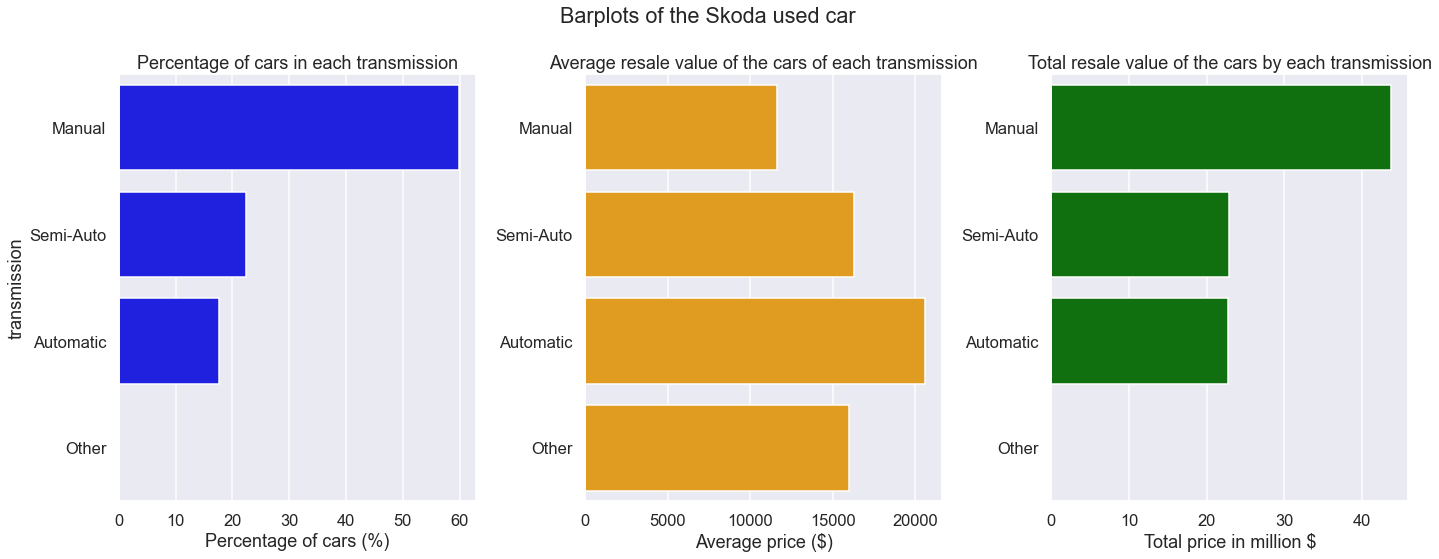

In [33]:
barplot('transmission')

**Observation:**
   * The top selling car transmission type is Manual.
   * The top average selling price car transmission type is Automatic.
   * The top total selling price car transmission type is Manual

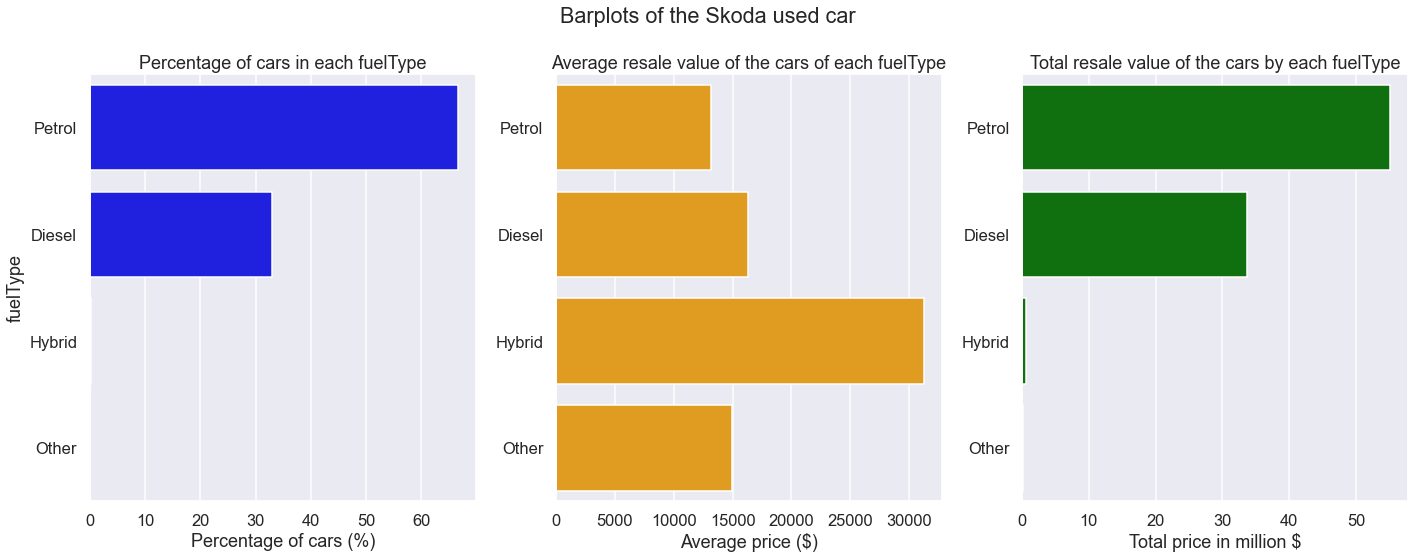

In [34]:
barplot('fuelType')

**Observation:**
   * The top selling car fuel type is Petrol.
   * The top average selling price car fuel type is Hybrid.
   * The top total selling price car fuel type is Petrol.

### Creating Pivot table

In [35]:
df_pivot = pd.pivot_table(df, index='model', values='price', aggfunc=['count', 'mean', 'sum'])
display(df_pivot)

,count,mean,sum
,price,price,price
model,,,
Citigo,470,6925.561702,3255014
Fabia,1571,9906.497136,15563107
Kamiq,141,19904.290780,2806505
Karoq,390,21067.546154,8216343
Kodiaq,472,25652.368644,12107918
Octavia,1477,13991.955315,20666118
Rapid,152,8277.611842,1258197
Roomster,17,5407.882353,91934
